#Machine learning avec sklearn
Dans ce fichier on va tester des classifiers differents avec la dataset titanic


##ICI LA PARTIE IMPORTATION
####on a commencé par l'importation des bibliothéque pandas, NumPy, Scikit-Learn, Matplotlib, seaborn


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns

#Import titanic

voilà la commande de la définition de notre data frame

In [ ]:
df = pd.read_csv("titanic.csv")

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##ANALYSE EXPLICATIVE

### ici nous avons fait une analyse explicative sous forme de statistique pour chaque variable





In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


###Exploration 
ici on dresser un tableau hist pour explorer la column "age"

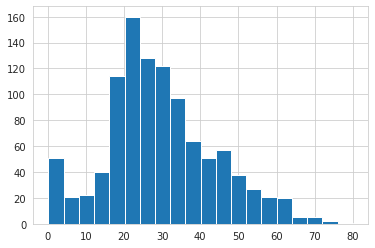

In [ ]:
df.age.hist(bins=20)

###Exploration 
ici on dresser un tableau hist pour explorer la column "sex"

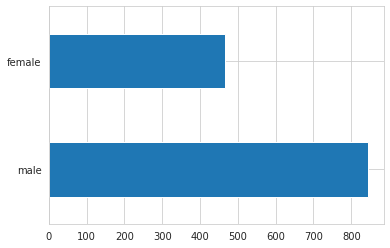

In [ ]:
df.sex.value_counts().plot(kind='barh')

###Exploration 
ici on dresser un tableau hist pour explorer la column "pclass"

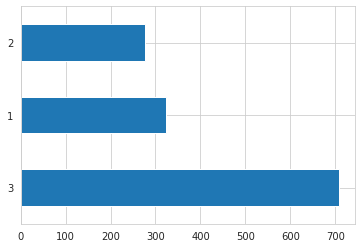

In [ ]:
df.pclass.value_counts().plot(kind='barh')

#Exploration selon l'indice de survie

On va esplorer les données qu'on a en appliquant des commandes qui permettent l'exploration selon l'indice de survie

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


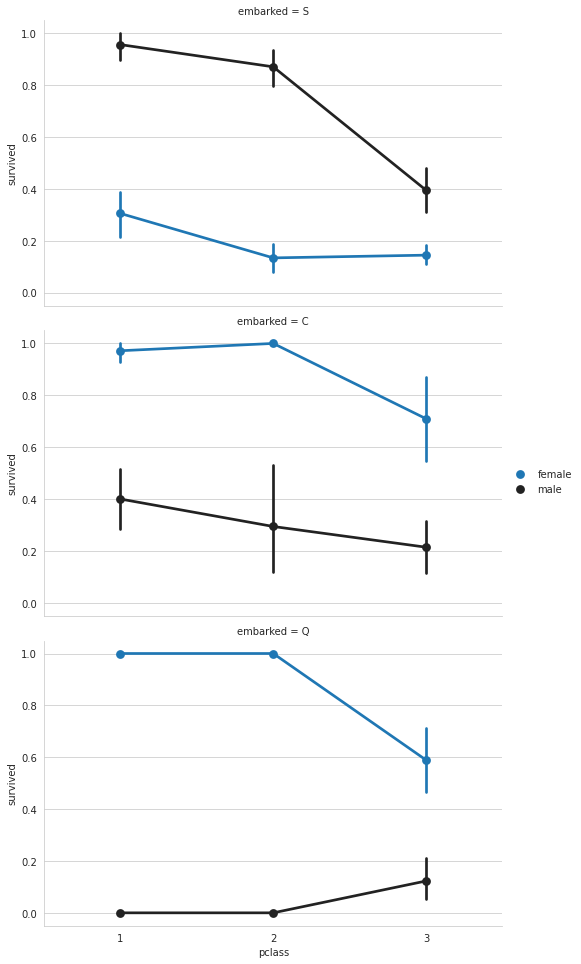

In [ ]:
FacetGrid = sns.FacetGrid(df, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

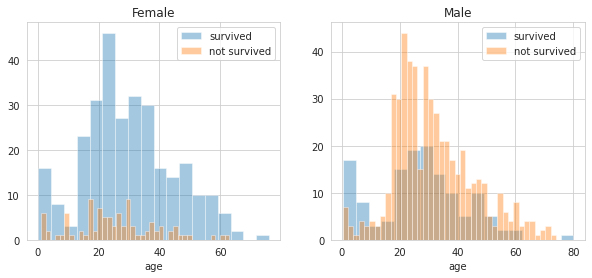

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

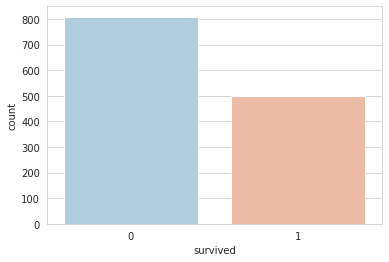

In [ ]:
#Now we plot the number of survivors 
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df,palette='RdBu_r')

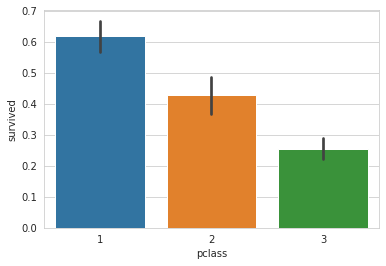

In [ ]:
sns.barplot(x='pclass', y='survived', data=df)

#Partie exploitation et dressage de notre Y





In [ ]:
y = df.pop("survived")
df.head() 

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#Séparation des axes x,y selon train, test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, y , test_size=0.1)
type(x_train)

pandas.core.frame.DataFrame

##affichage de l'axe train

In [ ]:
x_train.head() 

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1279,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,NaN,NaN,NaN
723,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q,NaN,NaN,"Philadelphia, PA"
528,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,NaN,NaN,Belfast
610,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,NaN,NaN,"Sweden Akeley, MN"
1093,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,NaN,NaN,NaN


In [ ]:
x_test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
673,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,NaN,NaN,Syria
1181,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S,NaN,NaN,NaN
925,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN
1106,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,NaN,NaN,NaN
605,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S,A,NaN,"Perkins County, SD"


#Information sur x_Train

On verifie si notre séparation est bien fonctionnel

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 1279 to 734
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1178 non-null   int64  
 1   name       1178 non-null   object 
 2   sex        1178 non-null   object 
 3   age        943 non-null    float64
 4   sibsp      1178 non-null   int64  
 5   parch      1178 non-null   int64  
 6   ticket     1178 non-null   object 
 7   fare       1177 non-null   float64
 8   cabin      264 non-null    object 
 9   embarked   1176 non-null   object 
 10  boat       430 non-null    object 
 11  body       114 non-null    float64
 12  home.dest  678 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 128.8+ KB


###Ici on va dresser le shape de notre axe X 

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1178, 13)
(131, 13)


#Tranformation des columns
on va appliquer la methode du column transformer on va commencer par importer la bibliothéque pour la création des pipelines puis on va faire les réparations sur les données


##Importation des Bibliothéques

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

##création des pipelines

In [ ]:
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'cabin','boat']
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## Apply ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
#

#La partie d'exploitation de nos données a été faites on va commencer la partie machine learning avec les algorithme suivant : 

- k-NN classifier
- Support Vector Machine classifier.
- Linear Discriminant Analysis classifier.
- Logistic Regression classifier
- Decision Tree classifier
- Voting Classifier using the previous algorithms
- Random Forest classifier.
- Gradient Boosting classifier
-  AdaBoost classifier


In [ ]:
y_train.head()

##k-NN classifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


KN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=3, algorithm='brute'))
])



KN.fit(x_train, y_train)
print(metrics.classification_report(KN.predict(x_test), y_test))
print(metrics.confusion_matrix(KN.predict(x_test), y_test))

##Voting classifier

Dans le voting classifier on va combiner des classificateurs d'apprentissage machine conceptuellement et utiliser un vote soft 

le VotingClassifier (avec vote = «dur») classerait l'échantillon comme «classe 1» sur la base de l'étiquette de classe majoritaire.
Dans le cas d'une égalité, le VotingClassifier sélectionnera la classe en fonction de l'ordre de tri croissant




In [ ]:
from sklearn.ensemble import VotingClassifier

VC =  VotingClassifier(estimators=[('kn', KN), ('svc', svc), ('lr', LR), ('dtc', DTC)])

VC.fit(x_train, y_train)
print(metrics.classification_report(VC.predict(x_test), y_test))
print(metrics.confusion_matrix(VC.predict(x_test), y_test))

##random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfc', RandomForestClassifier(max_depth = 3, random_state = 0))
])

RFC.fit(x_train, y_train)
print(metrics.classification_report(RFC.predict(x_test), y_test))
print(metrics.confusion_matrix(RFC.predict(x_test), y_test))


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression(solver='lbfgs'))
])

LR.fit(x_train, y_train)
print(metrics.classification_report(LR.predict(x_test), y_test))
print(metrics.confusion_matrix(LR.predict(x_test), y_test))

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DTC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dtc', DecisionTreeClassifier(max_depth = 3, random_state = 0))
])

DTC.fit(x_train, y_train)
print(metrics.classification_report(DTC.predict(x_test), y_test))
print(metrics.confusion_matrix(DTC.predict(x_test), y_test))

##AdaBoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ABC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('abc', AdaBoostClassifier(random_state = 0))
])

ABC.fit(x_train, y_train)
print(metrics.classification_report(ABC.predict(x_test), y_test))
print(metrics.confusion_matrix(ABC.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       261
           1       0.91      0.98      0.95       132

    accuracy                           0.96       393
   macro avg       0.95      0.97      0.96       393
weighted avg       0.96      0.96      0.96       393

[[248  13]
 [  2 130]]


#comparaison des algorithme avec 




##Methode 1


``` Python

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

```


##methode 2


In [ ]:
models = []
models.append((KN, 'KNeighborsClassifier'))
models.append((svc, 'Super Vector Machine Classifier'))
#models.append((LDA, 'Linear Discriminant Analysis Classifier'))
models.append((LR, 'Logistic Regression classifier'))
models.append((DTC, 'Decision Tree Classifier'))
models.append((VC, 'Voting Classifier'))
models.append((RFC, 'Random forest Classifier'))
models.append((GBC, 'Gradient Boost Classifier'))
models.append((ABC, 'AdaBoost classifier'))

models_name = []
prescisions = []
recalls = []
f1_scores = []

i = 0

for model, name in models:
    models_name.append(name)
    prescisions.append(metrics.precision_score(model.predict(x_test), y_test))
    recalls.append(metrics.recall_score(model.predict(x_test), y_test))
    f1_scores.append(metrics.f1_score(model.predict(x_test), y_test))
    

pdf = pd.DataFrame({
    'Model': models_name,
    'Precision' : prescisions,
    'Recall' : recalls, 
    'F1 Score' : f1_scores
})
pdf.sort_values(by = 'Precision', ascending = False)

,Model,Precision,Recall,F1 Score
6,Gradient Boost Classifier,0.916084,0.963235,0.939068
1,Super Vector Machine Classifier,0.909091,0.992366,0.948905
2,Logistic Regression classifier,0.909091,0.992366,0.948905
4,Voting Classifier,0.909091,0.992366,0.948905
7,AdaBoost classifier,0.909091,0.984848,0.945455
3,Decision Tree Classifier,0.902098,0.984733,0.941606
5,Random forest Classifier,0.818182,0.983193,0.893130
0,KNeighborsClassifier,0.811189,0.950820,0.875472


#Bonus : Transformation sans columns transformer 
Dans cette partie on a essayé de créer des transformation sans columns transformers en modifiant les données columns par columns selon nos besoin, cette methode nous a présenter quelques erreurs en algorithmes plus tards ce qui nous laisse revenir vers la methodes colums transformes


#Bonus


In [ ]:
total = x_train.isnull().sum().sort_values(ascending=False)
percent_1 = x_train.isnull().sum()/x_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
body,1064,90.3
cabin,914,77.6
boat,748,63.5
home.dest,500,42.4
age,235,19.9


In [ ]:
x_train.columns.values

array(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'], dtype=object)

In [ ]:
to_be_removed = ['name', 'cabin', 'ticket', 'passengerId']

La transformation va être une conversion des cellule nulle

Création d'un array avec des variable random pour the feature 'age'

réparation de 'Embarked'

In [ ]:
x_train['embarked'].describe()

count     1176
unique       3
top          S
freq       821
Name: embarked, dtype: object

In [ ]:
common_value = 'S'
data = [x_train]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 1279 to 734
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1178 non-null   int64  
 1   name       1178 non-null   object 
 2   sex        1178 non-null   object 
 3   age        943 non-null    float64
 4   sibsp      1178 non-null   int64  
 5   parch      1178 non-null   int64  
 6   ticket     1178 non-null   object 
 7   fare       1177 non-null   float64
 8   cabin      264 non-null    object 
 9   embarked   1178 non-null   object 
 10  boat       430 non-null    object 
 11  body       114 non-null    float64
 12  home.dest  678 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 128.8+ KB


Drop fo Tickets


In [ ]:
x_train = x_train.drop(['ticket'], axis=1)
